# Wisconsin Breast Cancer Classification

In this problem we have to use 30 different columns and we have to predict the Stage of Breast Cancer *M (Malignant)* and *B (Bengin)*. This analysis has been done using Basic Machine Learning Algorithm with detailed explanation. The data we will use for this example is the Wisconsin Breast Cancer dataset, which is download from Kaggle. https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

### Loading Dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
breast_cancer_dataset = pd.read_csv('breast_cancer.csv')
breast_cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


  ### Explore the Dataset:

In [3]:
print("Keys of breast_cancer_dataset: \n{}".format(breast_cancer_dataset.keys()))

Keys of breast_cancer_dataset: 
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [4]:
breast_cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
breast_cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### We will drop the column that we don't want

In [6]:
breast_cancer_dataset.drop("Unnamed: 32", axis=1, inplace=True)
breast_cancer_dataset.drop("id", axis=1, inplace=True)

In [7]:
breast_cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

#### As we see from the data set that we can divide the columns into three parts 

In [8]:
features_mean = list(breast_cancer_dataset.columns[1:11])
features_se = list(breast_cancer_dataset.columns[11:21])
features_worst = list(breast_cancer_dataset.columns[21:31])

print(features_mean, '\n')
print(features_se, '\n')
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'] 

['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se'] 

['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [9]:
breast_cancer_dataset.diagnosis = breast_cancer_dataset.diagnosis.map({'M':1, 'B':0})

In [10]:
breast_cancer_dataset.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Frequency of cancer stages

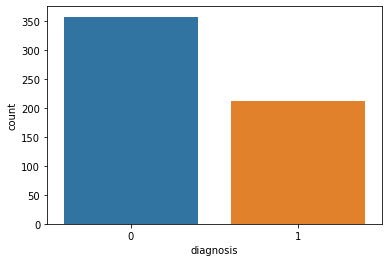

In [11]:
sns.countplot(breast_cancer_dataset.diagnosis, label = "Count")

### Data Analysis a little feature selection

We will draw a correlation graph so that we can remove multi-colinearity. ie., the columns that are depending on eachother. We should avoid it.

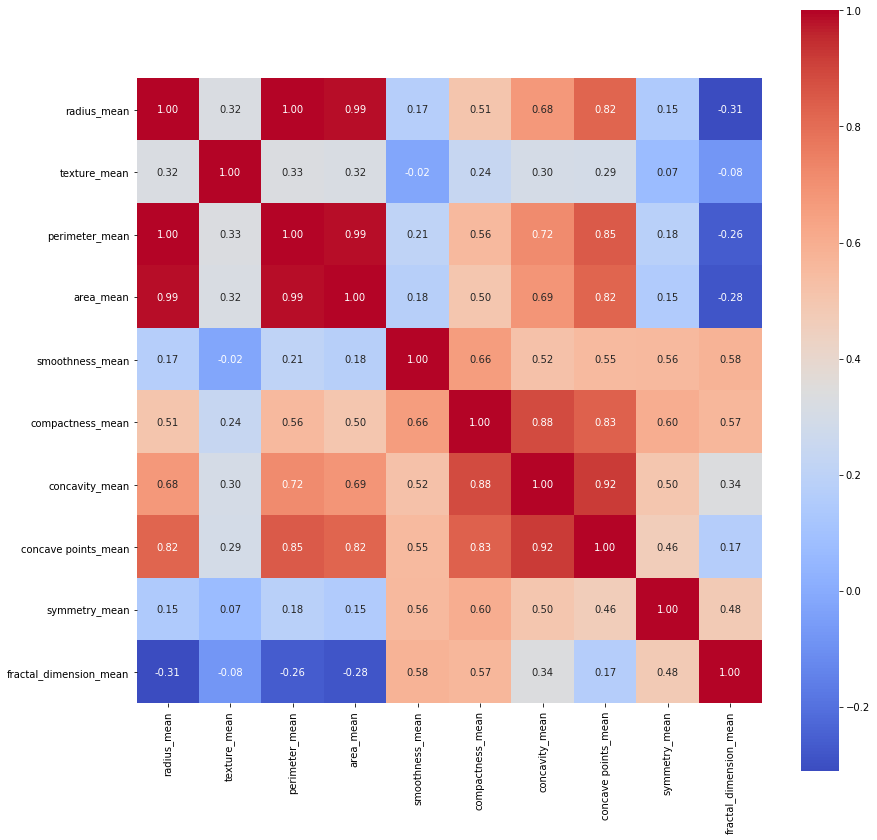

In [12]:
corr = breast_cancer_dataset[features_mean].corr()
plt.figure(figsize=(14,14))

sns.heatmap(corr, cbar = True, square = True, 
            annot = True, fmt = '.2f', cmap = 'coolwarm')

#### Observation

* `radius_mean`, `perimeter_mean` and `area_mean` are highly correlated as expected from their relation so from these we can use anyone of them.  

* `compactness_mean`, `concavity_mean` and `concave points_mean` are also highly correlated so we will use `compactness_mean` from here.  
  
* so let's select `perimeter_mean`, `texture_mean`, `compactness_mean`, `symmetry_mean` and `smoothness_mean` from above for prediction.

In [13]:
prediction_var = ['texture_mean', 'perimeter_mean', 
                  'smoothness_mean', 'compactness_mean', 
                  'symmetry_mean']

### Initialize the model - RandomForestClassifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_dataset[prediction_var], 
                                                    breast_cancer_dataset['diagnosis'], 
                                                    test_size = 0.3, random_state=0)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(398, 5)
(398,)
(171, 5)
(171,)


### Training the model

In [17]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Making Prediction

In [18]:
y_pred = classifier.predict(X_test)

### Checking model performance / accuracy of the model

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8947368421052632

In [20]:
classifier.score(X_test, y_test)

0.8947368421052632

### Checking the importance of features based on current model

In [21]:
featimp = pd.Series(classifier.feature_importances_, 
                    index=prediction_var).sort_values(ascending=False)

print(featimp)

perimeter_mean      0.461499
compactness_mean    0.274748
texture_mean        0.130222
smoothness_mean     0.079722
symmetry_mean       0.053809
dtype: float64


#### Lets try some other models

### Initialize the model - SVM

In [56]:
from sklearn import svm

model = svm.SVC()

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_dataset[prediction_var], 
                                                    breast_cancer_dataset['diagnosis'], 
                                                    test_size = 0.3, random_state=0)

In [24]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9122807017543859

### Let's use all variable from features_mean above, so that from Random Forest we can learn which features are important

In [30]:
prediction_var = features_mean

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_dataset[prediction_var], 
                                                    breast_cancer_dataset['diagnosis'], 
                                                    test_size = 0.3, random_state=0)

classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9415204678362573

In [33]:
featimp = pd.Series(classifier.feature_importances_, 
                    index=prediction_var).sort_values(ascending=False)

print(featimp)

concave points_mean       0.353775
concavity_mean            0.154616
perimeter_mean            0.132272
area_mean                 0.097495
radius_mean               0.084536
compactness_mean          0.059773
texture_mean              0.056635
smoothness_mean           0.026339
symmetry_mean             0.018955
fractal_dimension_mean    0.015604
dtype: float64


So the above data shows which features among `features_mean` are important and plays a big role in performance.

### Let's check the same for SVM

In [34]:
prediction_var = features_mean

In [35]:
from sklearn import svm
model = svm.SVC()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_dataset[prediction_var], 
                                                    breast_cancer_dataset['diagnosis'], 
                                                    test_size = 0.3, random_state=0)
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8771929824561403

We can see that the accuracy of SVM decreased so much by taking all the features_mean into account

### Now let's take only top 5 important features from `features_mean` given by RandomForestClassifier.

In [37]:
predcition_var = ['concave points_mean', 
                  'concavity_mean', 
                  'radius_mean', 
                  'perimeter_mean', 
                  'area_mean']

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_dataset[prediction_var], 
                                                    breast_cancer_dataset['diagnosis'], 
                                                    test_size = 0.3, random_state=0)

classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.935672514619883

### Again same for SVM

In [40]:
predcition_var = ['concave points_mean', 
                  'concavity_mean', 
                  'radius_mean', 
                  'perimeter_mean', 
                  'area_mean']

In [41]:
from sklearn import svm
model = svm.SVC()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_dataset[prediction_var], 
                                                    breast_cancer_dataset['diagnosis'], 
                                                    test_size = 0.3, random_state=0)
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8771929824561403

So from this, we got multi colinearty affecting our SVM part a lot but it is not affecting much to RandomForest.

#### Now lets do with the 3rd part of data which is worst first start with all features_worst

### For RandomForestClassifier

In [43]:
prediction_var = features_worst

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_dataset[prediction_var], 
                                                    breast_cancer_dataset['diagnosis'], 
                                                    test_size = 0.3, random_state=0)

classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9590643274853801

In [46]:
featimp = pd.Series(classifier.feature_importances_, 
                    index=prediction_var).sort_values(ascending=False)

print(featimp)

concave points_worst       0.270250
perimeter_worst            0.251523
radius_worst               0.144205
area_worst                 0.140135
concavity_worst            0.052316
symmetry_worst             0.036757
compactness_worst          0.031516
smoothness_worst           0.028298
texture_worst              0.025718
fractal_dimension_worst    0.019282
dtype: float64


### Checking the same for SVM

In [47]:
prediction_var = features_worst

In [48]:
from sklearn import svm
model = svm.SVC()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_dataset[prediction_var], 
                                                    breast_cancer_dataset['diagnosis'], 
                                                    test_size = 0.3, random_state=0)
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9298245614035088

### Now let's take only top 5 important features from `features_worst` given by RandomForestClassifier.

In [50]:
prediction_var = ['concave points_worst',
                 'perimeter_worst',
                 'radius_worst',
                 'area_worst',
                 'concavity_worst']

In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_dataset[prediction_var], 
                                                    breast_cancer_dataset['diagnosis'], 
                                                    test_size = 0.3, random_state=0)

classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.935672514619883

### Again same for SVM

In [53]:
prediction_var = ['concave points_worst',
                 'perimeter_worst',
                 'radius_worst',
                 'area_worst',
                 'concavity_worst']

In [54]:
from sklearn import svm
model = svm.SVC()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_dataset[prediction_var], 
                                                    breast_cancer_dataset['diagnosis'], 
                                                    test_size = 0.3, random_state=0)
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9298245614035088

#### from this I think the RandomForestClassifier will be better for making predictions